Minimum pixel intensity: 15.0
Maximum pixel intensity: 255.0


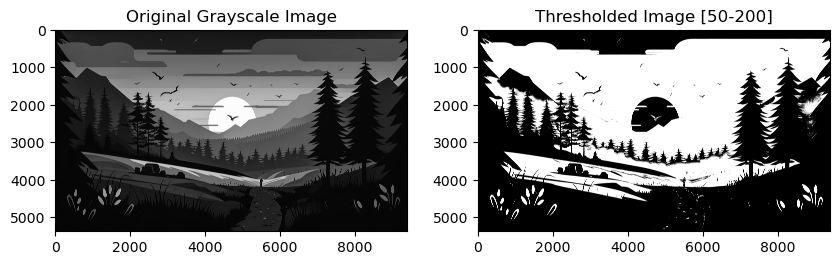

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('abc.jpg')

# Step 2: Convert the image to grayscale (if it's not already grayscale)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Find the minimum and maximum pixel intensity values
min_val, max_val, _, _ = cv2.minMaxLoc(gray_image)
print(f"Minimum pixel intensity: {min_val}")
print(f"Maximum pixel intensity: {max_val}")

# Step 4: Apply manual threshold (you can change the threshold values)
threshold_min = 50  # Set your own minimum threshold value
threshold_max = 200  # Set your own maximum threshold value

# Apply thresholding
_, binary_image = cv2.threshold(gray_image, threshold_min, 255, cv2.THRESH_BINARY)
_, binary_max = cv2.threshold(gray_image, threshold_max, 255, cv2.THRESH_BINARY_INV)

# Combine the two thresholds
thresholded_image = cv2.bitwise_and(binary_image, binary_max)

# Step 5: Display the original and thresholded images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Thresholded Image [{threshold_min}-{threshold_max}]')
plt.imshow(thresholded_image, cmap='gray')

plt.show()

In [ ]:
#AUGMENTATION 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to analyze image dimensions
def analyze_image(image):
    height, width, channels = image.shape
    print(f"Image Dimensions: Width={width}, Height={height}, Channels={channels}")
    return width, height, channels

# Function to apply image augmentations
def augment_image(image):
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    image = np.expand_dims(image, 0)  # Reshape for data augmentation
    
    aug_iter = datagen.flow(image, batch_size=1)
    aug_image = next(aug_iter)[0].astype('uint8')
    
    return aug_image

# Function to scale pixel values
def scale_image(image):
    scaled_image = image / 255.0
    print(f"Image scaled to range [0, 1].")
    return scaled_image

# Function to resize image
def resize_image(image, width, height):
    resized_image = cv2.resize(image, (width, height))
    print(f"Image resized to {width}x{height}.")
    return resized_image

# Load an image using OpenCV
image_path = 'abc.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert BGR to RGB for displaying using matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 1. Analyze Image Dimensions
    analyze_image(image)

    # 2. Apply Image Augmentation
    augmented_image = augment_image(image)

    # 3. Scale Image
    scaled_image = scale_image(image)

    # 4. Resize Image to 200x200
    resized_image = resize_image(image, 200, 200)

    # Display the original, augmented, and resized images
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(image)
    
    plt.subplot(1, 3, 2)
    plt.title('Augmented Image')
    plt.imshow(augmented_image)
    
    plt.subplot(1, 3, 3)
    plt.title('Resized Image (200x200)')
    plt.imshow(resized_image)
    
    plt.show()